In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.datasets import imdb
from keras.layers import Dense, LSTM, Embedding, Input, Bidirectional

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
valid = pd.read_csv('data/valid.csv')

In [4]:
x_train, y_train = train['review'], train['polarity']
x_test, y_test = test['review'], test['polarity']
x_valid, y_valid = valid['review'], valid['polarity']

In [5]:
voca = 10001
emb = 100
seq_len = 100

In [6]:
encoder = keras.layers.TextVectorization(max_tokens=voca, output_sequence_length=seq_len)
encoder.adapt(x_train)

In [7]:
model=keras.Sequential()
model.add(keras.Input(shape=(1,), dtype=tf.string, name='text'))
model.add(encoder)
model.add(Embedding(input_dim=voca, output_dim=emb, mask_zero=True))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 100)       │     1,000,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 128)       │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,130,086 (4.31 MB)

 Trainable params: 1,130,086 (4.31 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train.values, y_train, epochs=3, batch_size=256, validation_data=(x_valid.values, y_valid), verbose=1)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 316ms/step - accuracy: 0.8803 - loss: 0.2742 - val_accuracy: 0.9076 - val_loss: 0.2231
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 324ms/step - accuracy: 0.9195 - loss: 0.1968 - val_accuracy: 0.9143 - val_loss: 0.2121
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 326ms/step - accuracy: 0.9388 - loss: 0.1546 - val_accuracy: 0.9140 - val_loss: 0.2186


In [10]:
model.evaluate(x_test.values, y_test, batch_size=32, verbose=1)

625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9151 - loss: 0.2136


[0.21361880004405975, 0.915149986743927]

<Axes: >

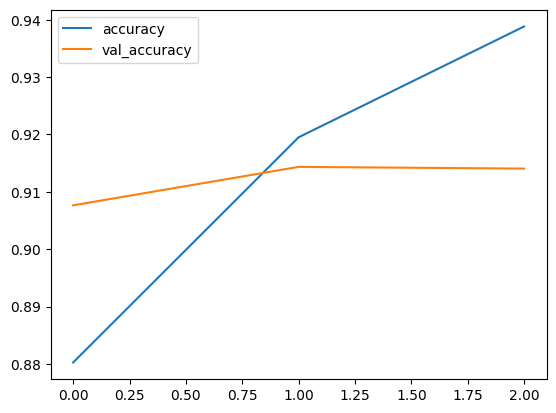

In [11]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

In [12]:
y_pred = model.predict(x_test.values)

625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step
